In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("ready")



ready


## Research Questions

1.How has the number of air crashes changed over time (1908–2023)?

2.Which years recorded the highest number of air crashes?

3.What are the deadliest air crashes in history?

4.Which aircraft types are most frequently involved in crashes?

5.Which locations (countries/regions) experience the most air crashes?

6.Is there a relationship between year and number of fatalities?

In [2]:
df = pd.read_csv(r"C:\Users\tolan\Desktop\air-crash-project\Data\air_crashes.csv")

df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


In [3]:
df.tail()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
5030,1980,Qtr 3,September,17,Zaire,De Havilland,de Havilland DHC 5 Buffalo9T,Near Kindu Zaire,Force Air Zairean - Military,0,36,36
5031,1997,Qtr 3,September,12,Zaire,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 3009Q,Near Uvira Zaire,Commuter Air TMK,0,22,22
5032,1984,Qtr 3,September,11,Zaire,Handley Page Dart Herald,Handley Page Dart Herald 2029Q CAH,Near the Kwango River Zaire,Services Aero MMM,0,30,30
5033,1980,Qtr 3,September,14,Zaire,Lockheed Hercules,Lockheed Hercules C 1309T,Kindu Zaire,Zaïroise Aérienne Force - Military,0,36,36
5034,1961,Qtr 3,September,17,Zambia,Douglas,Douglas DC 6BSE,Ndola Zambia,Sweden Transair,0,16,16


In [4]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5035 non-null   int64 
 1   Quarter                5035 non-null   object
 2   Month                  5035 non-null   object
 3   Day                    5035 non-null   int64 
 4   Country/Region         4805 non-null   object
 5   Aircraft Manufacturer  5035 non-null   object
 6   Aircraft               5035 non-null   object
 7   Location               5035 non-null   object
 8   Operator               4801 non-null   object
 9   Ground                 5035 non-null   int64 
 10  Fatalities (air)       5035 non-null   int64 
 11  Aboard                 5035 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 472.2+ KB


,Year,Day,Ground,Fatalities (air),Aboard
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000
mean,1970.991063,15.785104,1.704469,22.218868,31.107249
std,24.814467,8.794474,55.105115,34.948929,45.740185
min,1908.000000,1.000000,0.000000,0.000000,0.000000
25%,1951.000000,8.000000,0.000000,4.000000,7.000000
50%,1970.000000,16.000000,0.000000,11.000000,16.000000
75%,1992.000000,23.000000,0.000000,25.000000,34.500000
max,2024.000000,31.000000,2750.000000,583.000000,644.000000


In [5]:
#Checking Missing Values
df.isnull().sum()

Year                       0
Quarter                    0
Month                      0
Day                        0
Country/Region           230
Aircraft Manufacturer      0
Aircraft                   0
Location                   0
Operator                 234
Ground                     0
Fatalities (air)           0
Aboard                     0
dtype: int64

In [6]:
# Fill missing values
df['Month_num'] = pd.to_datetime(df['Month'], format='%B').dt.month







In [7]:
df['Date'] = pd.to_datetime(
    dict(
        year=df['Year'],
        month=df['Month_num'],
        day=df['Day']
    ),
    errors='coerce'
)



In [8]:
df[['Year', 'Month', 'Day', 'Date']].head()


,Year,Month,Day,Date
0,1970,April,28,1970-04-28
1,1952,April,30,1952-04-30
2,1973,April,10,1973-04-10
3,2000,April,19,2000-04-19
4,1946,April,30,1946-04-30


In [9]:
df = df.dropna(subset=['Date'])
df.drop(columns=['Month_num'], inplace=True)


In [10]:
df['Country/Region'] = df['Country/Region'].fillna('Unknown')


## Date Handling

The dataset stored Month values as text (e.g., "April"), which prevented
direct conversion to datetime format. The Month column was first converted
to numeric values before combining Year, Month, and Day to create a proper
Date column for time-based analysis.


In [11]:
df.groupby('Year').size().head()


Year
1908    1
1909    1
1912    1
1913    3
1915    2
dtype: int64

In [29]:
print(df.shape)
print(df.isnull().sum())
df.head()


(5035, 13)
Year                       0
Quarter                    0
Month                      0
Day                        0
Country/Region             0
Aircraft Manufacturer      0
Aircraft                   0
Location                   0
Operator                 234
Ground                     0
Fatalities (air)           0
Aboard                     0
Date                       0
dtype: int64


,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,Date
0,1970,Qtr 2,April,28,Unknown,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11,1970-04-28
1,1952,Qtr 2,April,30,Unknown,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9,1952-04-30
2,1973,Qtr 2,April,10,Unknown,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145,1973-04-10
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24,2000-04-19
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12,1946-04-30


# Summary for Data Cleaning

- Filled missing fatalities and aboard values with 0
- Converted Date column to datetime
- Extracted Year from Date
- Removed rows with invalid dates


EXPLORATORY DATA ANALYSIS (EDA)

In [13]:
#Crashes over time
crashes_per_year = df.groupby('Year').size()




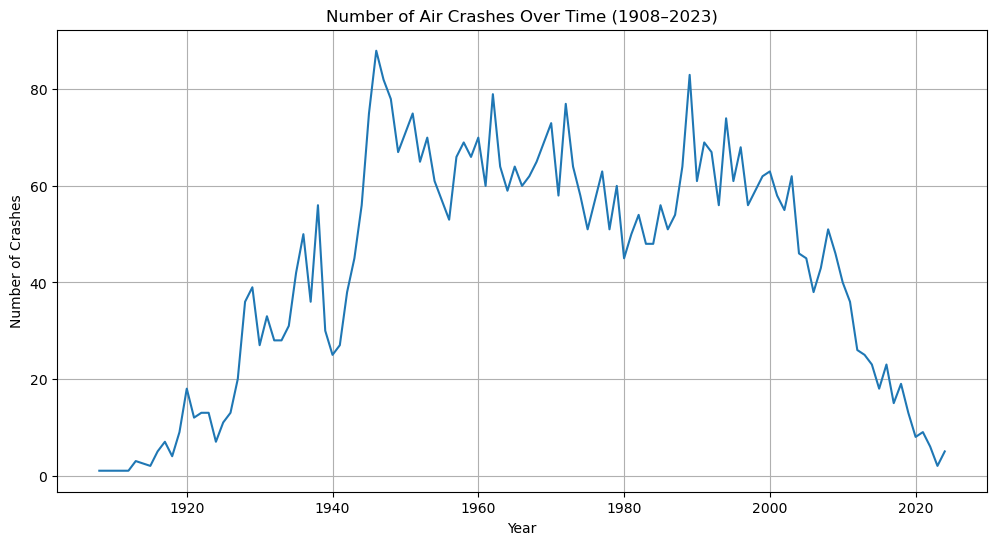

In [14]:
plt.figure(figsize=(12,6))
crashes_per_year.plot()
plt.title("Number of Air Crashes Over Time (1908–2023)")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.show()


In [15]:
#Top year Number of Crashes
top_years = crashes_per_year.sort_values(ascending=False).head(10)
top_years



Year
1946    88
1989    83
1947    82
1962    79
1948    78
1972    77
1951    75
1945    75
1994    74
1970    73
dtype: int64

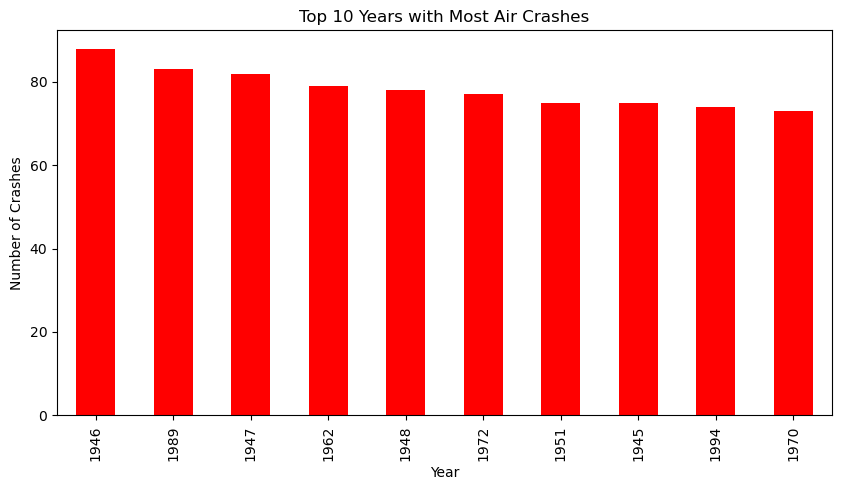

In [16]:
plt.figure(figsize=(10,5))
top_years.plot(kind='bar', color='red')
plt.title("Top 10 Years with Most Air Crashes")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.show()


In [17]:
#Deadliest air Crash In History
deadliest = df[['Date', 'Aircraft', 'Location', 'Operator', 'Fatalities (air)']].sort_values(by='Fatalities (air)', ascending=False).head(10)
deadliest


,Date,Aircraft,Location,Operator,Fatalities (air)
2999,1977-03-27,Boeing B 747,Tenerife Canary,KLM / Airways World American IslandsPan,583
622,1985-08-12,Boeing B 747,Mt. Osutaka near,Japan Village Ueno Japan Air Lines,520
3885,1996-11-12,Boeing B 747,Near Charkhi Dadri India,Airlines Kazakhstan / Airlines Arabian Saudi,349
3063,1974-03-03,McDonnell Douglas DC 10,Near Ermenonville France,(THY) Airlines Turkish,346
2562,1985-06-23,Boeing B 747,Atlantic Ocean 110,India IrelandAir of West miles,329
719,1980-08-19,Lockheed 1011 200 TriStarHZ,Riyadh Saudi,Airlines Arabian ArabiaSaudi,301
2535,2014-07-17,Boeing 777 2H6ER9M,Hrabove Ukraine,Airlines Malaysia,298
2409,1988-07-03,Airbus A300B2 203EP,Over the Persian Gulf near,Iran Abbas Bandar Iran Air,290
1463,2003-02-19,Ilyushin Il 76MD15,Near Shahdad Iran,Corps Guards Revolution's Islamic - Military,275
3489,1979-05-25,McDonnell Douglas DC 10,Chicago O'Hare Illinois,Airlines American,271


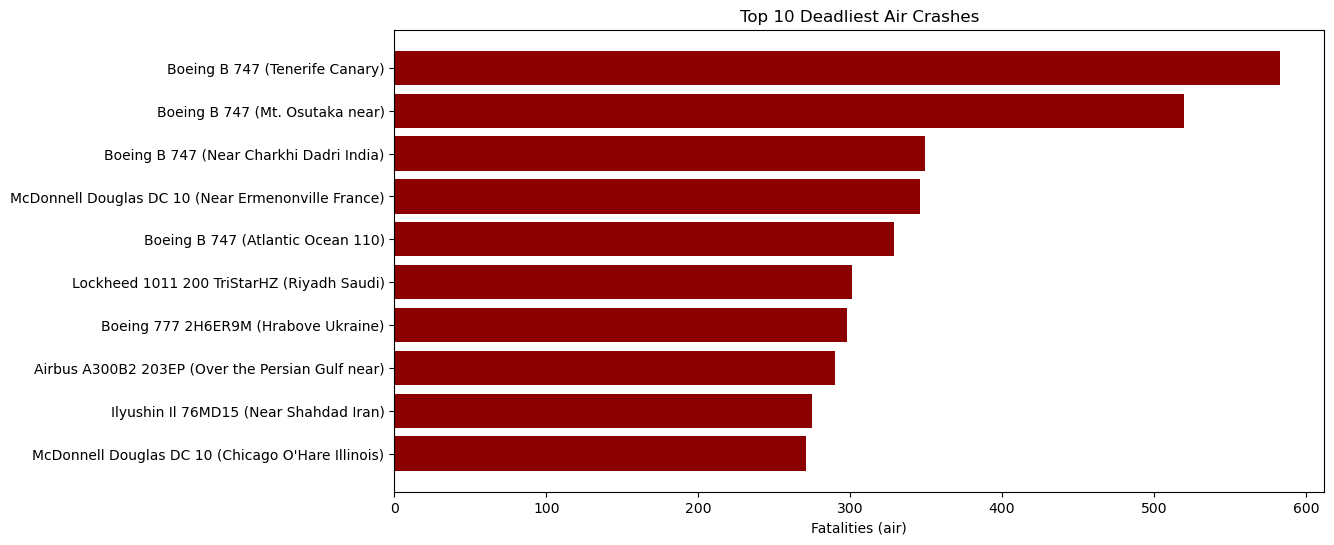

In [18]:
plt.figure(figsize=(12,6))
plt.barh(deadliest['Aircraft'] + " (" + deadliest['Location'] + ")", deadliest['Fatalities (air)'], color='darkred')
plt.xlabel("Fatalities (air)")
plt.title("Top 10 Deadliest Air Crashes")
plt.gca().invert_yaxis()  # Highest on top
plt.show()


In [19]:
#Frequestly Crashed Aircraft
aircraft_counts = df['Aircraft'].value_counts().head(10)
aircraft_counts


Aircraft
Boeing B 737              73
Boeing B 727              56
Boeing B 707              51
McDonnell Douglas DC 9    42
Douglas C 47A             39
Britten  Norman BN        37
McDonnell Douglas DC 8    36
Boeing B 747              30
Douglas DC 3PP            24
Douglas DC 3 (C           23
Name: count, dtype: int64

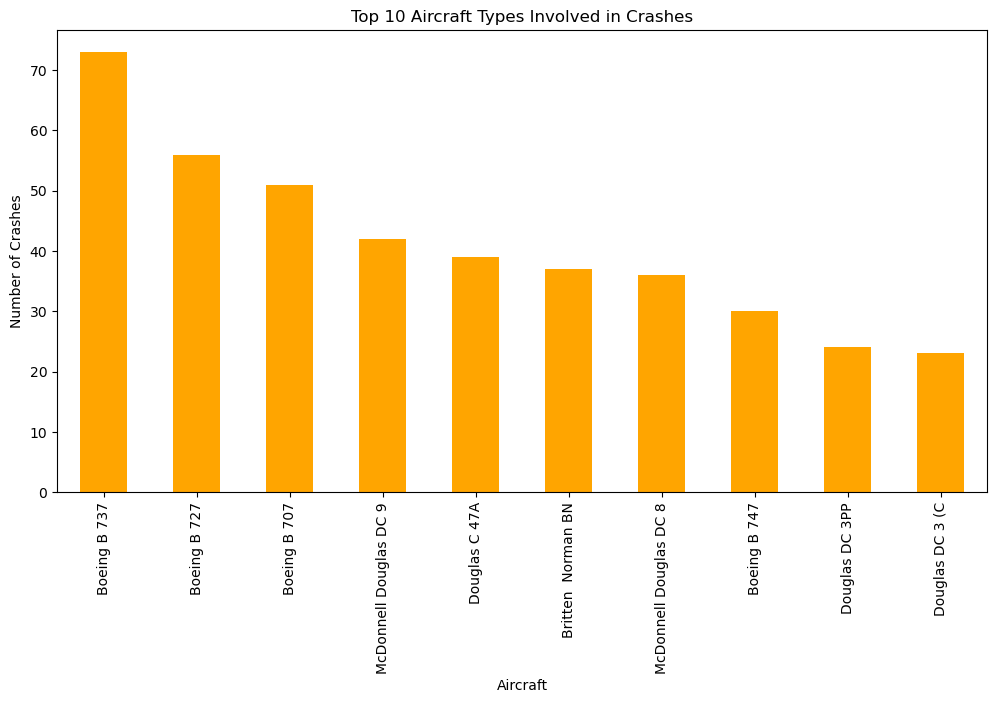

In [20]:
plt.figure(figsize=(12,6))
aircraft_counts.plot(kind='bar', color='orange')
plt.title("Top 10 Aircraft Types Involved in Crashes")
plt.xlabel("Aircraft")
plt.ylabel("Number of Crashes")
plt.show()


In [21]:
#which country experience most air crashes

country_counts = df['Country/Region'].value_counts().head(10)
country_counts


Country/Region
Russia        249
Unknown       230
Brazil        162
Colombia      146
New           142
California    112
France        111
Alaska        101
India          96
South          92
Name: count, dtype: int64

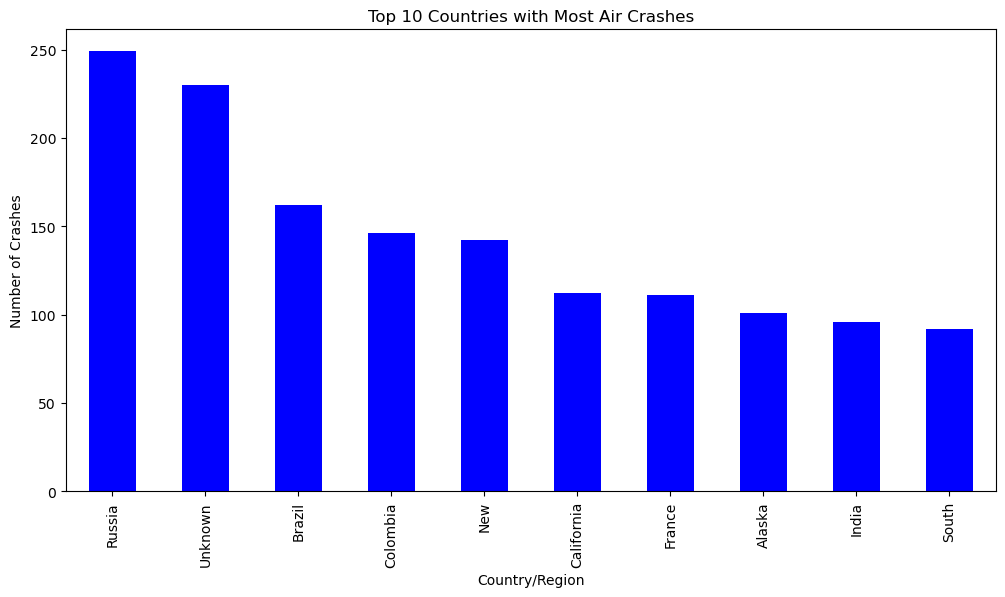

In [22]:
plt.figure(figsize=(12,6))
country_counts.plot(kind='bar', color='blue')
plt.title("Top 10 Countries with Most Air Crashes")
plt.xlabel("Country/Region")
plt.ylabel("Number of Crashes")
plt.show()


In [23]:
print(df.columns)
print(df.dtypes)
print(df.shape)


Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities (air)', 'Aboard', 'Date'],
      dtype='object')
Year                              int64
Quarter                          object
Month                            object
Day                               int64
Country/Region                   object
Aircraft Manufacturer            object
Aircraft                         object
Location                         object
Operator                         object
Ground                            int64
Fatalities (air)                  int64
Aboard                            int64
Date                     datetime64[ns]
dtype: object
(5035, 13)


In [24]:
df.columns = df.columns.str.strip()


In [25]:
fatalities_per_year = df.groupby('Year')['Fatalities (air)'].sum()
fatalities_per_year.head()


Year
1908     1
1909     1
1912     5
1913    43
1915    36
Name: Fatalities (air), dtype: int64

In [26]:
fatalities_per_year = df.groupby('Year')['Fatalities (air)'].sum()
fatalities_per_year.head()


Year
1908     1
1909     1
1912     5
1913    43
1915    36
Name: Fatalities (air), dtype: int64

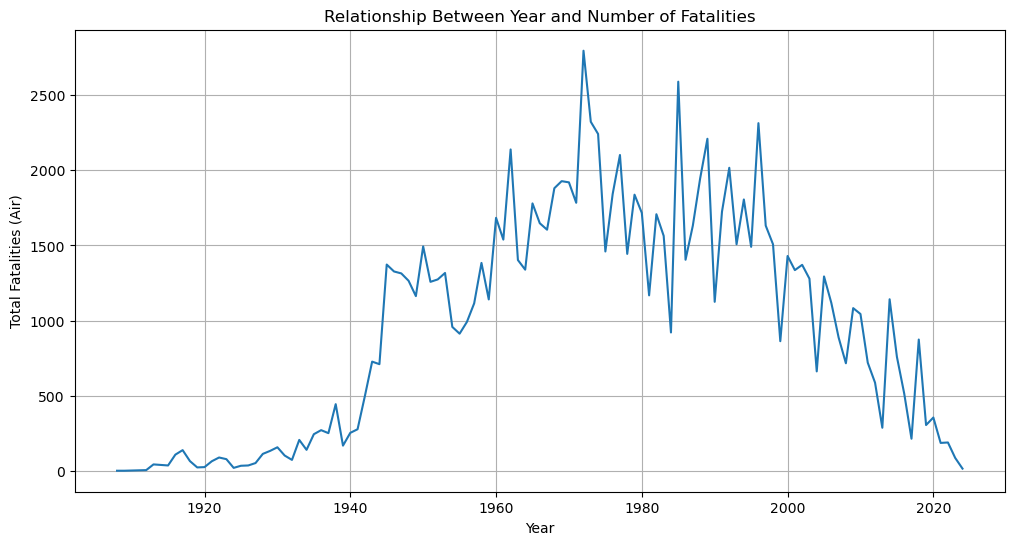

In [27]:
plt.figure(figsize=(12,6))
fatalities_per_year.plot()
plt.title("Relationship Between Year and Number of Fatalities")
plt.xlabel("Year")
plt.ylabel("Total Fatalities (Air)")
plt.grid(True)
plt.show()


In [28]:
#Correllation Check
correlation = df[['Year', 'Fatalities (air)']].corr()
correlation


,Year,Fatalities (air)
Year,1.000000,0.161195
Fatalities (air),0.161195,1.000000


## FINDINGS

1. Air crashes were more frequent between the 1940s and 1970s.
2. Fatalities peaked during periods of rapid aviation growth.
3. Some aircraft models appear more frequently due to higher usage.
4. Improvements in aviation technology reduced crashes in recent years.

## RECOMMENDATIONS

1. Continuous aircraft maintenance and safety checks should be enforced.
2. Older aircraft models should be phased out.
3. Pilot training and safety regulations should be strengthened.
4. Aviation authorities should focus on high-risk regions.
